In [3]:
import pandas as pd
dataset = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
dataset.shape

(319795, 18)

In [5]:
hdata = dataset.sample(frac=0.94, random_state=850)
hdata_unseen = dataset.drop(hdata.index)
hdata.reset_index(inplace=True, drop=True)
hdata_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(hdata.shape))
print('Unseen Data For Predictions: ' + str(hdata_unseen.shape))

Data for Modeling: (300607, 18)
Unseen Data For Predictions: (19188, 18)


In [6]:
from pycaret.classification import *

In [16]:
exp_clf101 = setup(data = hdata, target = 'SkinCancer', session_id=123, silent = True)

,Description,Value
0,session_id,123
1,Target,SkinCancer
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(300607, 18)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,13
8,Ordinal Features,0
9,High Cardinality Features,0


In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9067,0.7996,0.0003,0.5000,0.0005,0.0004,0.0102,3.2500
ridge,Ridge Classifier,0.9067,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0950
dummy,Dummy Classifier,0.9067,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500
svm,SVM - Linear Kernel,0.9066,0.0000,0.0011,0.1660,0.0022,0.0016,0.0083,0.9470
ada,Ada Boost Classifier,0.9066,0.7985,0.0007,0.2592,0.0014,0.0009,0.0092,1.8370
gbc,Gradient Boosting Classifier,0.9066,0.8000,0.0014,0.4306,0.0027,0.0022,0.0200,6.9720
lightgbm,Light Gradient Boosting Machine,0.9066,0.8007,0.0002,0.0833,0.0004,0.0002,0.0013,0.5560
lda,Linear Discriminant Analysis,0.9057,0.7900,0.0192,0.3967,0.0366,0.0282,0.0702,0.4810
knn,K Neighbors Classifier,0.8947,0.6313,0.0499,0.2194,0.0813,0.0484,0.0638,15.8930
rf,Random Forest Classifier,0.8870,0.7293,0.0759,0.2095,0.1114,0.0650,0.0747,5.5530


In [18]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [20]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9067,0.8008,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9067,0.7984,0.0005,1.0000,0.0010,0.0009,0.0215
2,0.9067,0.7967,0.0005,1.0000,0.0010,0.0009,0.0215
3,0.9065,0.8001,0.0000,0.0000,0.0000,-0.0002,-0.0031
4,0.9067,0.7981,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9066,0.8045,0.0000,0.0000,0.0000,-0.0001,-0.0022
6,0.9067,0.8019,0.0005,1.0000,0.0010,0.0009,0.0215
7,0.9067,0.7974,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9067,0.7979,0.0005,1.0000,0.0010,0.0009,0.0215
9,0.9067,0.7998,0.0005,1.0000,0.0010,0.0009,0.0215


In [21]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [22]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9067,0.8008,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9067,0.7984,0.0005,1.0000,0.0010,0.0009,0.0215
2,0.9067,0.7966,0.0005,1.0000,0.0010,0.0009,0.0215
3,0.9065,0.8001,0.0000,0.0000,0.0000,-0.0002,-0.0031
4,0.9067,0.7981,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9066,0.8045,0.0000,0.0000,0.0000,-0.0001,-0.0022
6,0.9067,0.8019,0.0005,1.0000,0.0010,0.0009,0.0215
7,0.9067,0.7974,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9067,0.7979,0.0005,1.0000,0.0010,0.0009,0.0215
9,0.9067,0.7998,0.0005,1.0000,0.0010,0.0009,0.0215


In [23]:
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


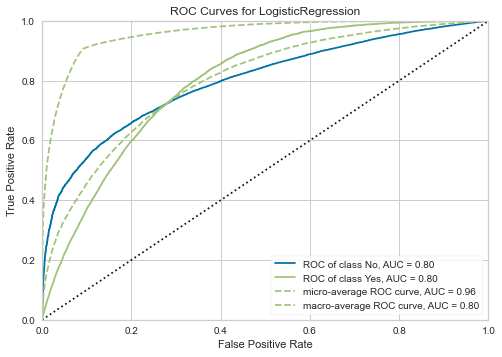

In [24]:
plot_model(tuned_lr, plot = 'auc')

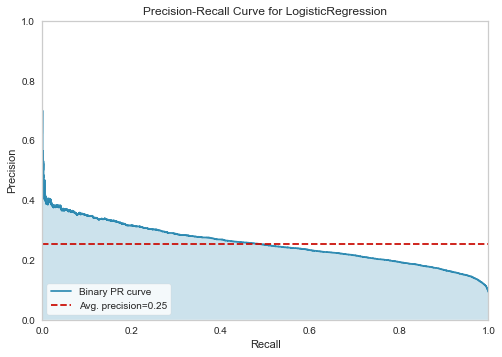

In [25]:
plot_model(tuned_lr, plot = 'pr')

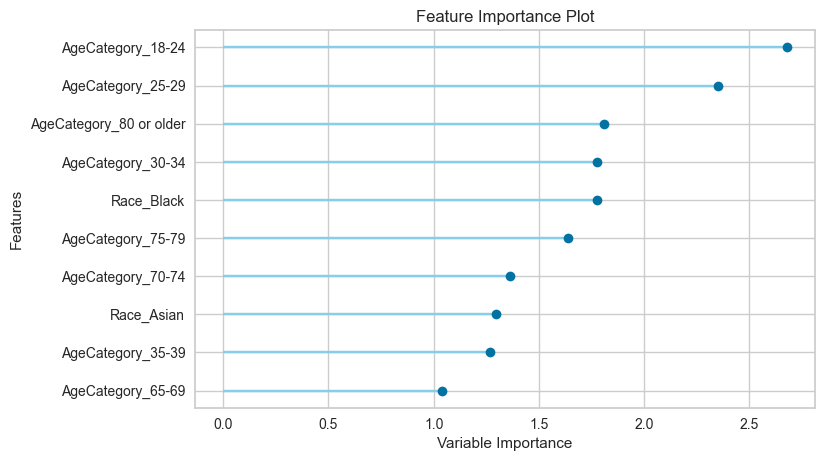

In [26]:
plot_model(tuned_lr, plot='feature')

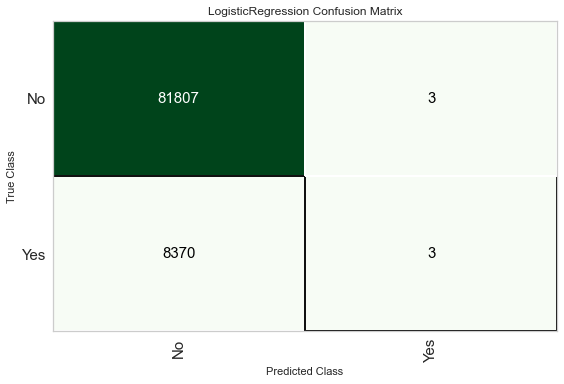

In [27]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [29]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9072,0.7987,0.0004,0.5000,0.0007,0.0006,0.0114


In [31]:
final_lr = finalize_model(tuned_lr)

In [32]:
print(final_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [33]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9072,0.7989,0.0004,0.5000,0.0007,0.0006,0.0114


In [35]:
unseen_predictions = predict_model(final_lr, data=hdata_unseen)
unseen_predictions.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Label,Score
0,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No,No,0.8457
1,No,28.15,No,No,No,7.0,0.0,Yes,Female,80 or older,White,No,No,Good,7.0,No,No,No,No,0.7813
2,No,26.26,No,No,No,5.0,2.0,No,Female,70-74,White,No,No,Very good,10.0,No,No,No,No,0.8464
3,No,22.59,Yes,No,No,0.0,30.0,Yes,Male,70-74,White,"No, borderline diabetes",Yes,Good,8.0,No,No,No,No,0.7528
4,No,21.16,No,No,No,0.0,0.0,No,Female,80 or older,Black,"No, borderline diabetes",No,Good,8.0,No,No,No,No,0.9849


In [36]:
save_model(final_lr,'Final LR Model 02Apr2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='SkinCancer', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.863, class_weight={}, dual=False,
                 